Used libraries and python version:
- Python 3.11.3
- Pandas 1.5.3
- Numpy 1.24.3
- Matplotlib 3.7.1
- scikit-learn 1.2.2

# Machine learning Fraud casus

# Introduction


Fraud detection is a critical challenge in online transactions, where the ability to accurately identify fraudulent activities can save companies significant losses and enhance customer trust. In 2019, Kaggle hosted a competition with a high reward of €20,000, challenging participants to develop machine learning models capable of predicting fraudulent transactions. This competition attracted many participants, with the best algorithm achieving an impressive accuracy rate of 94%.

In this case study, we aim to take on this challenge ourselves by independently developing machine learning models to predict whether a transaction is fraudulent. The main objectives of this analysis are:

How accurately can we predict if a transaction is fraudulent?
Do the features in the dataset significantly impact whether a transaction is fraudulent?
Through this study, we hope to learn from the process, test our skills, and evaluate how close we can come to the benchmark set during the original competition.

# Data set explanation

The dataset comprises 600,000 transactions, with 20,000 labeled as fraudulent (isFraud = 1). It is split into two primary files:

Transaction Data

Contains details about individual transactions.
Key categorical features include:
ProductCD: The product code.
card1 - card6: Various card-related details.
addr1, addr2: Address information.
P_emaildomain, R_emaildomain: Sender and receiver email domains.
M1 - M9: Miscellaneous categorical flags.


Identity Data

Provides additional information about some transactions, such as device and ID details.
Key categorical features include:
DeviceType: Type of device used for the transaction.
DeviceInfo: Specific device details.
id_12 - id_38: Various identity-related attributes.
Special Notes:

Not all transactions in the dataset have corresponding identity information.


Files:

train_transaction.csv and train_identity.csv: Training dataset.

test_transaction.csv and test_identity.csv: Test dataset requiring predictions.
# Data Quality Assessment
The dataset used in this project had high quality but presented some challenges:

1. **Dataset Size:**
   - The dataset contained approximately 600,000 transactions with about 350 columns of data.

2. **Anonymized Columns:**
   - Many of the columns were anonymized for privacy reasons. 
   - This limited our understanding of what the data represented exactly, but it was sufficient for model training.

3. **Missing Values:**
   - A large portion of the columns contained NULL or empty values.
   - This required data cleaning and preprocessing, including:
     - Dropping columns with excessive missing values.
     - Imputing missing values in other columns.
   - Detailed steps for this process are documented in the Jupyter Notebook file `DataSetAnalysis.ipynb`.

## Data Preprocessing:
   - To handle the missing values and prepare the data for machine learning models, we performed the following steps:
     - Filled NULL values in the dataset using appropriate strategies (e.g., mean or median for numeric features, mode for categorical features).
     - Scaled all numeric features to a range of 0 to 1 using a Min-Max Scaler for consistency.
     - Converted categorical features into numerical values using one-hot encoding.
   - Additionally, we merged the two datasets (`train_transaction.csv` and `train_identity.csv`) based on their shared identifiers to create a unified dataset for analysis and modeling.

# Main question


How accurately can we predict whether an online transaction is fraudulent using machine learning models?

This dataset originates from a Kaggle competition held in 2019, where participants competed to predict fraudulent transactions, with a prize pool of €20,000. The challenge attracted alot of data scientists and machine learning enthusiasts, with the top-performing algorithm achieving an impressive accuracy rate of 94%.

Our main question mirrors this challenge, as we aim to explore how well we can predict fraudulent transactions independently. By creating our own algorithm without referencing other participants' solutions, we want to achieve the highest possible accuracy while applying our own strategies and techniques. This approach allows us to experience the challenge firsthand and evaluate our performance against the benchmark set by the competition.
# Sub questions

This casus requires us to independently create our own algorithm, so we chose to formulate our sub-questions in a way that allows each of us to approach the challenge individually. Both our sub-questions will follow the structure: 

"Do these features impact whether or not a transaction is fraudulent?"

Before finalizing the specific sub-questions, we will perform a dataset analysis to identify potential features that significantly influence whether a transaction is fraudulent. This analysis will guide us in selecting the features for each algorithm.

This analysis will be detailed in our next Jupyter file, titled DatasetAnalysis, and will guide us in selecting features for our algorithms.

# Bussiness understanding

In this dataset analysis, we aim to identify potential features that could significantly impact whether a transaction is fraudulent. By thoroughly analyzing the dataset, we hope to uncover patterns and correlations that will guide our feature selection and clean up our (very large) dataset.

The insights gained from this analysis will enable us to clearly and specifically formulate our two sub-questions, which will focus on the role of these features in predicting fraudulent transactions. 

### Specific data set explanation ("Transaction data")

In this section, we will dive deeper into the dataset by importing its features and providing a detailed explanation of each feature. Understanding the dataset's structure and the role of its features is essential for identifying those that may influence whether a transaction is fraudulent.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('train_transaction.csv')

# Get the column names (features)
features = df.columns
print(features)

As you can see from the code, the dataset contains 394 features. We need to comb through these columns and identify which ones are most relevant for our sub-question. Before diving into feature selection, we will first provide a detailed explanation of all the columns in the next section. This will help us understand the context of each feature and decide which ones might be important for predicting fraudulent transactions.

<br>

**1.Transaction Information:**


TransactionID:  Unique identifier for each transaction.

isFraud: Binary target variable indicating whether the transaction is fraudulent or not.

TransactionDT: Time delta from a reference datetime, representing the time of the transaction.

TransactionAmt: The amount of money involved in the transaction (in USD).

ProductCD: The product code, which may refer to different types of transactions (e.g., goods or services).

<br>

**2. Payment Card Information:**

card1 - card6: Features related to the payment card, such as card type, category, issuing bank, and country.

<br>

**3. Address Information:**

addr1, addr2: Billing and mailing address information.

dist1, dist2: Distance features, likely related to geographic location (e.g., distance between billing and shipping address, IP address, etc.).
<br>
<br>

**4. Email Domain Information:**

P_emaildomain, R_emaildomain: The email domains for the purchaser and recipient. Some transactions may not have a recipient email domain.
<br>
<br>

**5. Counting Features (C1 - C14):**

These columns contain counts, such as how many addresses or phone numbers are linked to a particular payment card or how many devices are associated with the transaction.
<br>
<br>

**6. Time Delta Features (D1 - D15):**

These features represent time differences, such as the number of days since the last transaction for the same user or card.
<br>
<br>

**7. Matching Features (M1 - M9):**

These columns are used to match various aspects of the transaction, such as matching names on the card and the address.
<br>
<br>


**8. Vesta Engineered Features (V1 - V339):**

These are features engineered by the Vesta team, which include various ranking, counting, and entity relations, such as the frequency of transactions associated with a specific card, email, or address in a given time window.

## Specific dataset explenation ("Identity"data)

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('train_identity.csv')

# Get the column names (features)
features = df.columns
print(features)

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')



The identity dataset contains a variety of features related to the identity and digital security of transactions. These features primarily focus on network connection information (IP, ISP, Proxy, etc.) and digital signatures (e.g., browser, operating system, device type), which are collected by Vesta's fraud protection system and their digital security partners. These are not available for all transactions.

**Breakdown of the identity dataset:**
<br>
<br>
**1. Transaction Information:**
<br>
<br>

**TransactionID:** 
<br>Unique identifier for each transaction (this is a common feature across both datasets).
<br>
<br>

**2. Identity Features (id_01 to id_11):**
<br>

<br>
These are numerical features associated with various identity-related information, such as device ratings, IP domain ratings, proxy ratings, and behavioral fingerprints. Examples of behavioral data might include account login times, failed login attempts, and how long an account stayed on the page. These features are collected by Vesta and security partners, but due to privacy agreements, the exact definitions are not provided. They will be treated as numerical/categorical features based on the context.
<br>
<br>

**3. Additional Identity Information (id_12 to id_38):**
<br>
id_12 to id_38: These additional identity-related features may include more specific or detailed information about a transaction's associated identity, such as timestamps of certain actions or events related to the account and device. However, the exact nature of these features is not explicitly disclosed, so further investigation and assumption may be needed.
<br>
<br>

**4. Device Information:**
<br>
DeviceType: Type of device used for the transaction (e.g., mobile, desktop).
DeviceInfo: A more detailed description of the device used, which could include specific information about the browser, operating system, and version being used during the transaction.
<br>
<br>

**General Observations:**
<br>
These features primarily help to track the behavior and characteristics of the user's device and account, which can be essential in detecting suspicious or fraudulent activities. For instance, frequent failed login attempts, a proxy server used, or a device with an unusual fingerprint might suggest a higher likelihood of fraud.

After the analysis of the identity features, we can formulate a sub-question related to how these features contribute to detecting fraudulent transactions:

**Sub-question: How do specific identity-related features, such as device type, IP address patterns, and behavioral data, contribute to identifying potentially fraudulent transactions?**

# Dependent and Independent Variables


### Dependent Variable:
- The dependent variable for our fraud detection project is **`isFraud`**.
  - This is a binary variable where:
    - `1` indicates a fraudulent transaction.
    - `0` indicates a non-fraudulent transaction.
  - The main goal of our machine learning model is to accurately predict this variable.

### Independent Variables:
- The independent variables are the features in the dataset that may help predict whether a transaction is fraudulent.
- These include:
  - **Transaction Data**: 
    - Examples: `TransactionAmt`, `ProductCD`, `card1` to `card6`, `addr1`, `addr2`, `P_emaildomain`, and `R_emaildomain`.
  - **Identity Data**: 
    - Examples: `DeviceType`, `DeviceInfo`, and `id_12` to `id_38`.
  - **Additional Features**: 
    - The dataset contains many other features (over 350 columns in total), including anonymized variables whose exact meanings are not specified but may still carry predictive value.

### Approach:
- Using a machine learning algorithm ( see below ), we aim to identify which independent variables contribute most to predicting fraudulent transactions.
- During the process, we will analyze feature importance and evaluate how each variable influences the detection of fraud.


## Is the Data suitable for our casus?

It is difficult to say with certainty whether the data is fully suitable for answering our main and sub-questions because many of the values are anonymized. This limits our understanding of the exact meaning of certain features and their relevance to detecting fraud. 

However, given the large amount of data (600,000 transactions with 350 columns), we can reasonably assume that the dataset provides enough information to build a predictive model. Ultimately, we will only know for sure whether the data is sufficient once we apply machine learning algorithms and evaluate their performance.
"""

## Sub questions


We have chosen to focus on one sub-question from the transaction dataset and one from the identity dataset to provide a analysis of the factors that contribute to fraudulent transactions.
<br>
By addressing both datasets separately, we aim to understand the role of both transaction details and identity-related features in fraud detection. This approach ensures a more separated investigation into the factors influencing fraudulent transactions.

**Sub-question 1 (Transaction Dataset):**
<br>
How do the features in the transaction dataset influence the likelihood of a transaction being fraudulent?
This question focuses on analyzing how various transaction-specific characteristics contribute to identifying fraudulent activities.

**Sub-question 2 (Identity Dataset):**
<br>
How do specific identity-related features contribute to identifying potentially fraudulent transactions?
The second sub-question investigates how identity-related factors, including device information, login behavior, and network-related details, can be used to flag suspicious activities. These features help track the user’s device and account behavior, which can serve as critical indicators of fraud. We will explore whether unusual device fingerprints, failed login attempts, or use of proxies correlate with a higher likelihood of fraudulent transactions.

# The models

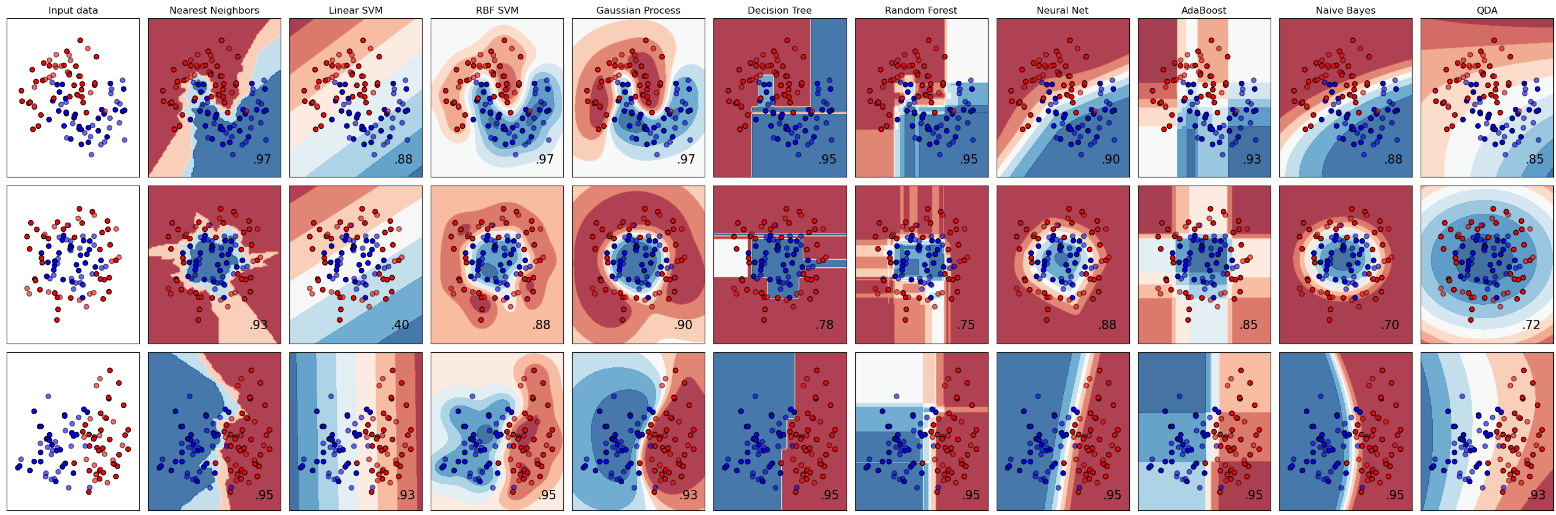

In [3]:
from IPython.display import Image
Image("models.png")

These are the classification models available in scikit-learn. We will use the Random Forest and Decision Tree models to predict whether a transaction is fraudulent or not. We will use these models because 

# Why Decision Tree Classifier?

A Decision Tree is like a flowchart that splits data into smaller parts based on simple questions 
(e.g., "Is the amount over $100?"). Here’s why it works well:

 Easy to Understand:
- It’s simple to see how the model makes decisions, which is helpful in fraud detection 
  to explain why a transaction is labeled as fraud.

 Feature Importance:
- Decision Trees can show which features (like card type or email domain) are most important 
  for predicting fraud.

 Handles Different Data Types:
- Works well with both numbers and categories (like ProductCD or DeviceType).

 Drawback:
- However, Decision Trees can sometimes "memorize" the data too much (overfitting), 
  making them less reliable for unseen data.


# Why Random Forest Classifier?

Random Forest is like using many Decision Trees together and combining their results 
for better predictions. Here’s why it’s even better:

 More Accurate:
- By using multiple trees, Random Forest makes fewer mistakes and generalizes better to new data.

 Reduces Overfitting:
- It avoids the problem of "memorizing" by averaging the results from different trees.

 Feature Analysis:
- Like Decision Trees, it helps identify which features matter most for fraud detection.

 Handles Missing Data Well:
- If some data points are missing, Random Forest still works effectively.


# Why These Models Are Suitable for Our Project

Decision Tree and Random Forest classifiers are ideal for our fraud detection project because:

1. **Binary Classification:** 
   - Fraud detection involves predicting whether a transaction is fraudulent or not, which both models handle effectively.

2. **Feature Insights:**
   - Both models provide insights into feature importance, helping us understand which attributes (e.g., card details, email domains) impact fraud detection the most.

3. **Handles Large Data:**
   - Random Forest works well with our large dataset (600,000 transactions) and can manage the high dimensionality (350 columns).

4. **Imbalanced Data:**
   - Fraud cases are rare in the dataset (20,000 out of 600,000). These models can be adjusted to focus more on these minority cases.

5. **Accuracy and Reliability:**
   - Random Forest offers high accuracy by averaging results from multiple Decision Trees, while Decision Trees provide interpretable results for understanding the dataset.





### Random Forest Classifier
we use random forest because it is very effective on datasets with a large number of features, it also handles irrelevant variables well.

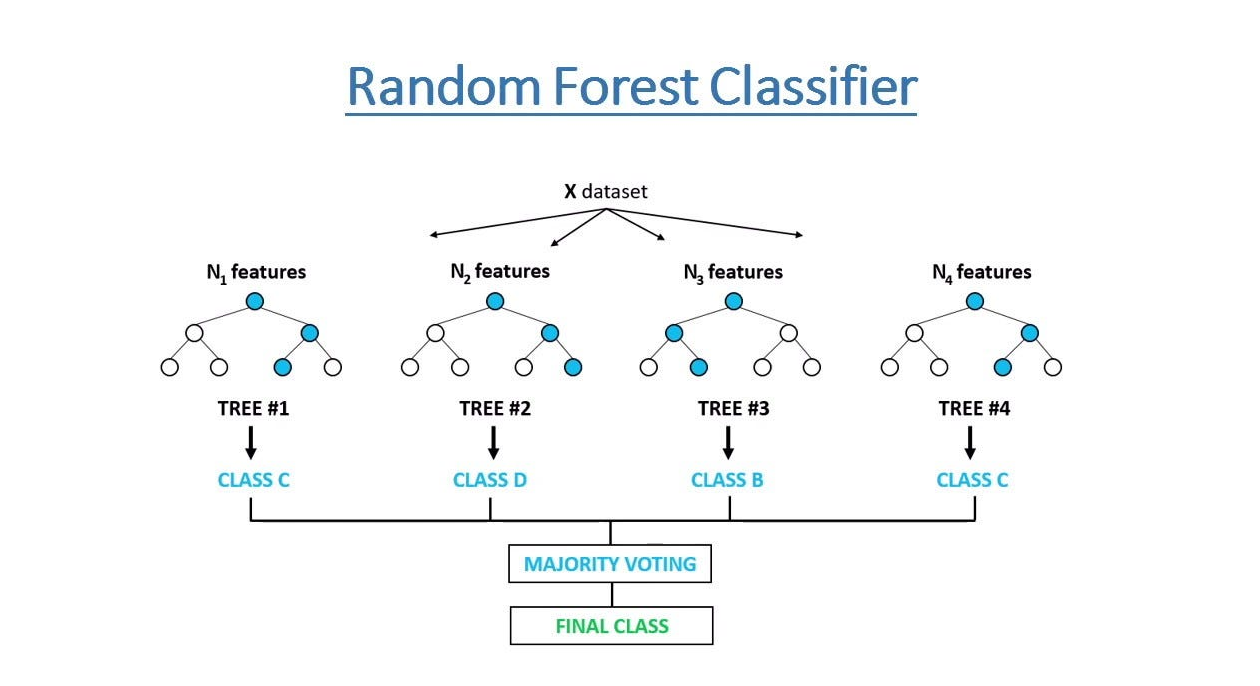

In [4]:
from IPython.display import Image
Image("random forest.png")

In [ ]:
# Jip will do this model

### Decision Tree Classifier

We use decision tree because it is easy to interpret and understand but we will need to select the most important features to use in the model.

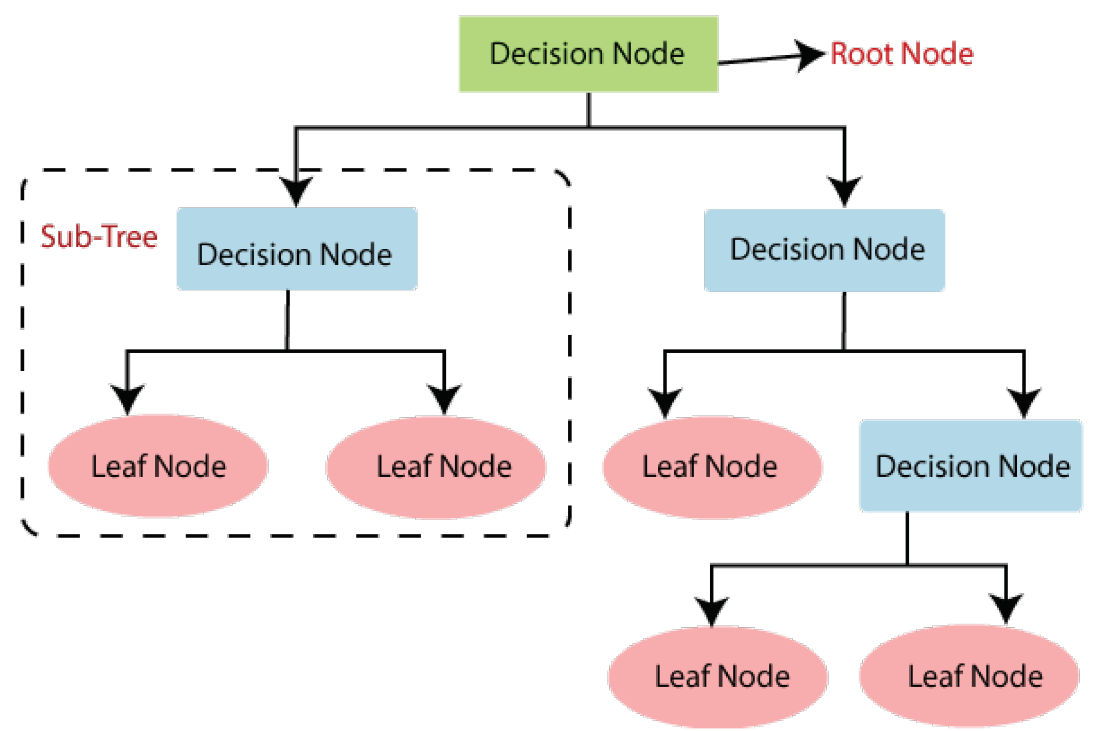

In [5]:
Image("Decision tree.png")

In [ ]:
# Joran will do this model

## Data exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data
train_transaction = pd.read_csv("train_transaction.csv")
train_identity = pd.read_csv("train_identity.csv")
test_transaction = pd.read_csv("test_transaction.csv")
test_identity = pd.read_csv("test_identity.csv")
# Merge the data
train_data = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test_data = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

We can merge the transaction and identity datasets on the TransactionID, this will give us 1 big dataset to work with

In [2]:
# Set pandas options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display all null values in train_data
null_counts = train_data.isnull().sum()
print(null_counts)

null_values = train_data.isnull().any().sum()
print(f"{null_values} of {train_data.shape[1]} columns have null values.")

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               8933
card3               1565
card4               1577
card5               4259
card6               1571
addr1              65706
addr2              65706
dist1             352271
dist2             552913
P_emaildomain      94456
R_emaildomain     453249
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
D1                  1269
D2                280797
D3                262878
D4                168922
D5                309841
D6                517353
D7                551623
D8                515614
D9                515614


We have analysed the data in another file because of the amount of graphs. Please view "TestModels.ipynb".

# Data cleaning

As we can see a lot of the columns contain NaN values. We will need to clean the data and fill in the missing values. We will also need to convert the categorical columns into numerical columns so that we can use them in our model.

We can probably predict most numerical values as most columns have >80% the same values, we will fill these NaNs with the median. For the categorical columns, we can't really predict so we will fill these values with unknown. We will also normalize the data so that we can use it in our model.

In [9]:
for column in train_data.columns:
    if train_data[column].dtype == np.float64:
        train_data[column].fillna(train_data[column].median(), inplace=True)
    elif train_data[column].dtype == np.int64:
        train_data[column].fillna(train_data[column].median(), inplace=True)
    else:
        train_data[column].fillna('unknown', inplace=True)

for column in test_data.columns:
    if test_data[column].dtype == np.float64:
        test_data[column].fillna(test_data[column].median(), inplace=True)
    elif test_data[column].dtype == np.int64:
        test_data[column].fillna(test_data[column].median(), inplace=True)
    else:
        test_data[column].fillna('unknown', inplace=True)

null_counts_train = train_data.isnull().any().sum()
null_counts_test = test_data.isnull().any().sum()

print(null_counts_train)
print(null_counts_test)

0
0


We will need to convert the categorical columns into numerical columns so that we can use them in our model. We will use the LabelEncoder from sklearn to do this.

if we look at the column names in the test set, we see that the id columns have a '-' instead of a '_', we will need to change this so that we can use our model on the test set.

In [3]:
test_data.columns = test_data.columns.str.replace('-', '_')

# Feature engineering

This dataset already has a lot of features, these features are annonimous so we don't know what they mean. So we will not add any new features to the dataset.

# Pre processing

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in train_data.columns:
    if train_data[column].dtype == type(object):
        train_data[column] = le.fit_transform(train_data[column])

for column in test_data.columns:
    if test_data[column].dtype == type(object):
        test_data[column] = le.fit_transform(test_data[column])

print(train_data.dtypes)
print(test_data.dtypes)

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD           int32
card1               int64
card2             float64
card3             float64
card4               int32
card5             float64
card6               int32
addr1             float64
addr2             float64
dist1             float64
dist2             float64
P_emaildomain       int32
R_emaildomain       int32
C1                float64
C2                float64
C3                float64
C4                float64
C5                float64
C6                float64
C7                float64
C8                float64
C9                float64
C10               float64
C11               float64
C12               float64
C13               float64
C14               float64
D1                float64
D2                float64
D3                float64
D4                float64
D5                float64
D6                float64
D7                float64
D8          

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_data[train_data.columns] = scaler.fit_transform(train_data[train_data.columns])
test_data[test_data.columns] = scaler.fit_transform(test_data[test_data.columns])

ValueError: could not convert string to float: 'W'

# Modellering 

for the models we only use the training data because the set will be too big to use if we use the test data as well.

### Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# set x and y for model
X = train_data.drop(['isFraud', 'TransactionID'], axis=1)
y = train_data['isFraud']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier model
rf = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=10, max_features='sqrt', n_jobs=-1)

# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1,
                       random_state=42)

# Analyses

### Random Forest Classifier

In [22]:
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss

# Train accuracy
y_train_pred = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

# Train Gini Index
y_train_prob = rf.predict_proba(X_train)[:, 1]
auc_score = roc_auc_score(y_train, y_train_prob)
gini_index_train = 2 * auc_score - 1
print(f"Training Gini Index: {gini_index_train}")

# Train entropy
entropy_loss_train = log_loss(y_train, y_train_prob)
print(f"Training Entropy: {entropy_loss_train}")

# Test accuracy
y_test_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

# Test Gini Index
y_test_prob = rf.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_test_prob)
gini_index_test = 2 * auc_score - 1
print(f"Test Gini Index: {gini_index_test}")

# Test entropy
entropy_loss = log_loss(y_test, y_test_prob)
print(f"Test Entropy: {entropy_loss}")

Training Accuracy: 0.9743899651166729
Training Gini Index: 0.7404618518589321
Training Entropy: 0.09724804864134372
Test Accuracy: 0.9725420801300505
Test Gini Index: 0.7431379550806276
Test Entropy: 0.10178957093182298


# Conclusies 